<h1 style='color:red' >Problem Statement : Predicting Home Prices in Banglore (Regression Project)</h1> 

Dataset is downloaded from here: https://www.kaggle.com/amitabhajoy/bengaluru-house-price-data

In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("Bengaluru_House_Data.csv")
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [3]:
# pd.set_option('display.max_rows', None)

In [4]:
df.shape

(13320, 9)

In [5]:
df.columns

Index(['area_type', 'availability', 'location', 'size', 'society',
       'total_sqft', 'bath', 'balcony', 'price'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [7]:
df.describe()

,bath,balcony,price
count,13247.000000,12711.000000,13320.000000
mean,2.692610,1.584376,112.565627
std,1.341458,0.817263,148.971674
min,1.000000,0.000000,8.000000
25%,2.000000,1.000000,50.000000
50%,2.000000,2.000000,72.000000
75%,3.000000,2.000000,120.000000
max,40.000000,3.000000,3600.000000


In [8]:
df.describe(include="O")

,area_type,availability,location,size,society,total_sqft
count,13320,13320,13319,13304,7818,13320
unique,4,81,1305,31,2688,2117
top,Super built-up Area,Ready To Move,Whitefield,2 BHK,GrrvaGr,1200
freq,8790,10581,540,5199,80,843


In [9]:
for columns in df.columns:
    print(columns, ":-")
    print(df[columns].unique())
    print(df[columns].value_counts())
    print("**************************************************************************************")

area_type :-
['Super built-up  Area' 'Plot  Area' 'Built-up  Area' 'Carpet  Area']
Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: area_type, dtype: int64
**************************************************************************************
availability :-
['19-Dec' 'Ready To Move' '18-May' '18-Feb' '18-Nov' '20-Dec' '17-Oct'
 '21-Dec' '19-Sep' '20-Sep' '18-Mar' '20-Feb' '18-Apr' '20-Aug' '18-Oct'
 '19-Mar' '17-Sep' '18-Dec' '17-Aug' '19-Apr' '18-Jun' '22-Dec' '22-Jan'
 '18-Aug' '19-Jan' '17-Jul' '18-Jul' '21-Jun' '20-May' '19-Aug' '18-Sep'
 '17-May' '17-Jun' '21-May' '18-Jan' '20-Mar' '17-Dec' '16-Mar' '19-Jun'
 '22-Jun' '19-Jul' '21-Feb' 'Immediate Possession' '19-May' '17-Nov'
 '20-Oct' '20-Jun' '19-Feb' '21-Oct' '21-Jan' '17-Mar' '17-Apr' '22-May'
 '19-Oct' '21-Jul' '21-Nov' '21-Mar' '16-Dec' '22-Mar' '20-Jan' '21-Sep'
 '21-Aug' '14-Nov' '19-Nov' '15-Nov' '16-Jul' '15-Jun' '17-Feb' '20-Nov'
 '20-Jul' '16-Sep

From above description, dropping un-necessery columns like availability and society.

In [10]:
df1 = df.drop(["availability","society"],axis=1)
df1

,area_type,location,size,total_sqft,bath,balcony,price
0,Super built-up Area,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Plot Area,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00
2,Built-up Area,Uttarahalli,3 BHK,1440,2.0,3.0,62.00
3,Super built-up Area,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00
4,Super built-up Area,Kothanur,2 BHK,1200,2.0,1.0,51.00
...,...,...,...,...,...,...,...
13315,Built-up Area,Whitefield,5 Bedroom,3453,4.0,0.0,231.00
13316,Super built-up Area,Richards Town,4 BHK,3600,5.0,NaN,400.00
13317,Built-up Area,Raja Rajeshwari Nagar,2 BHK,1141,2.0,1.0,60.00
13318,Super built-up Area,Padmanabhanagar,4 BHK,4689,4.0,1.0,488.00


<h2 style='color:blue'>EDA</h2>

                                             |                                             | [  0%]   00:00 ->…


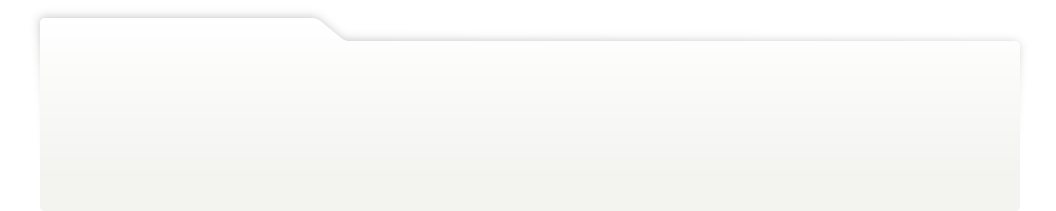
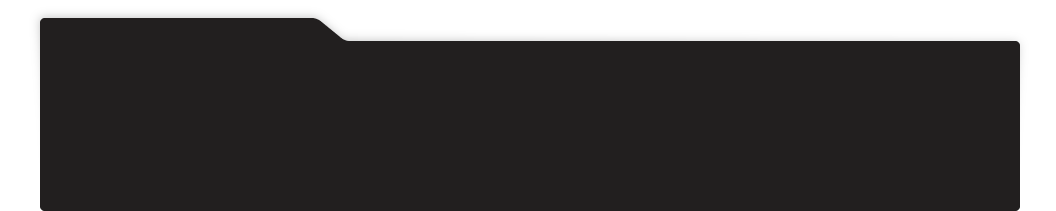
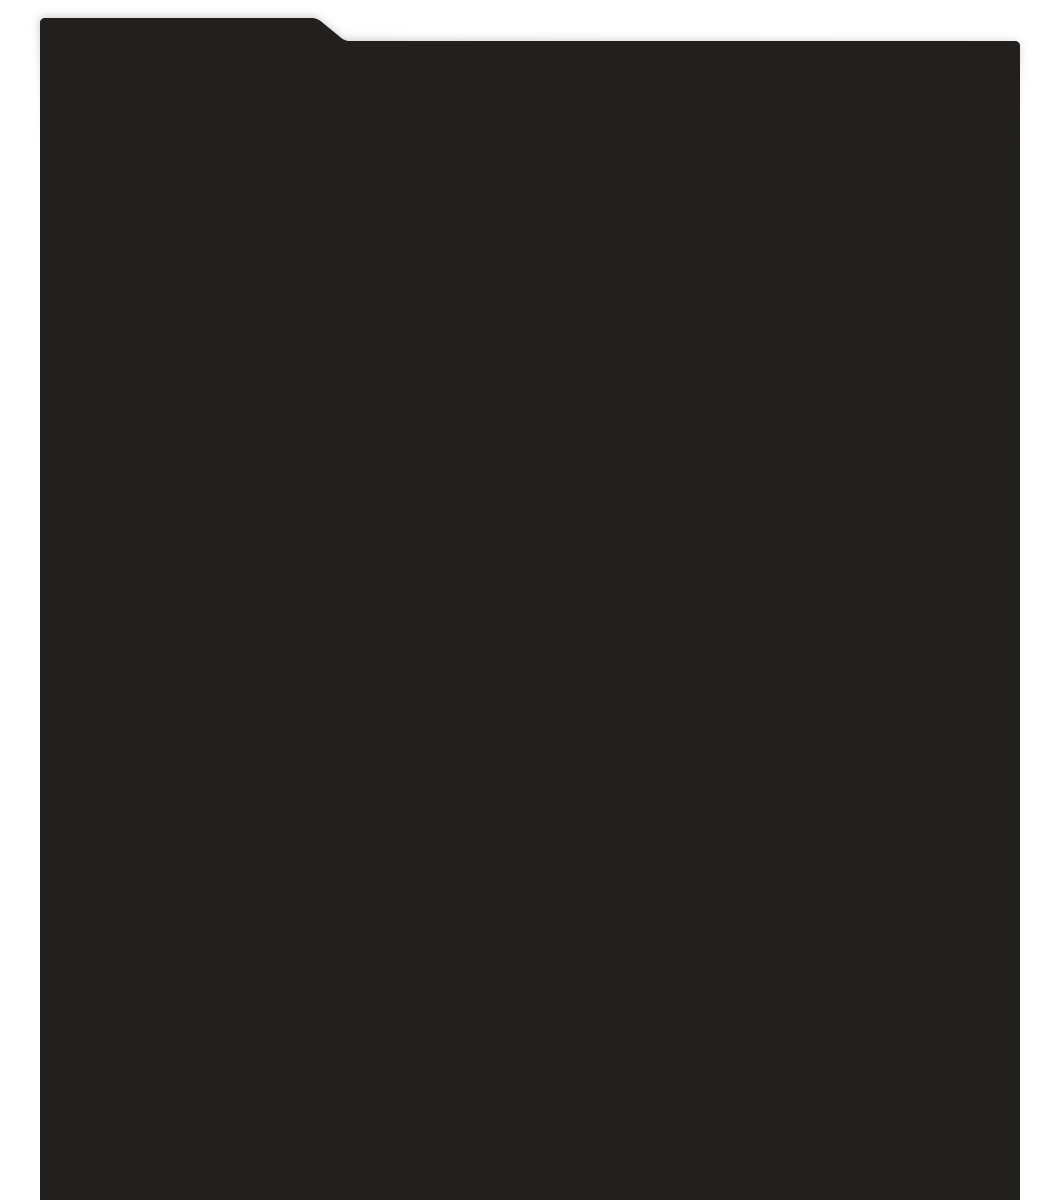
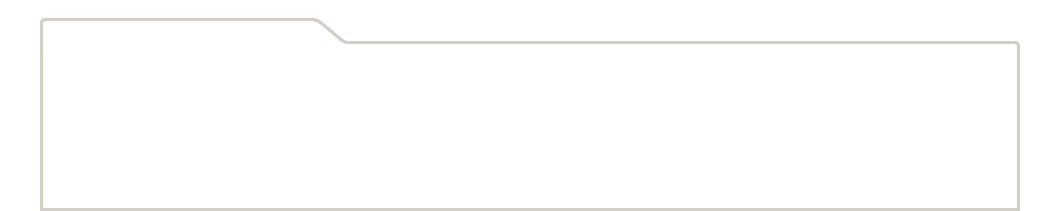
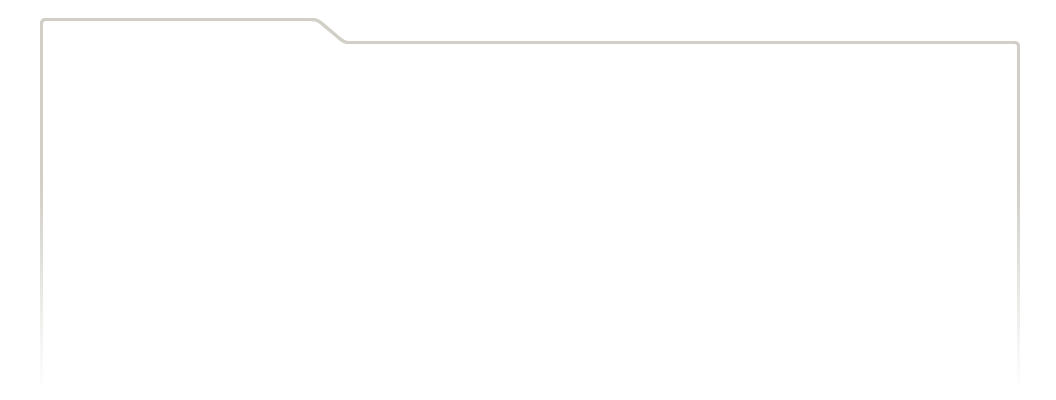
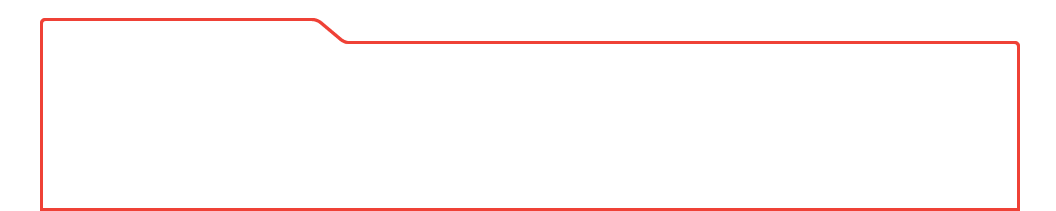
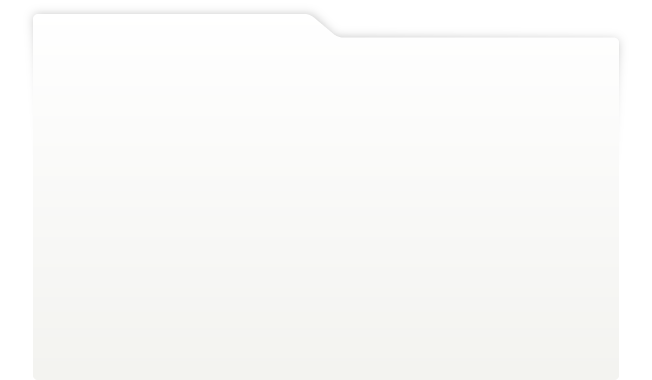
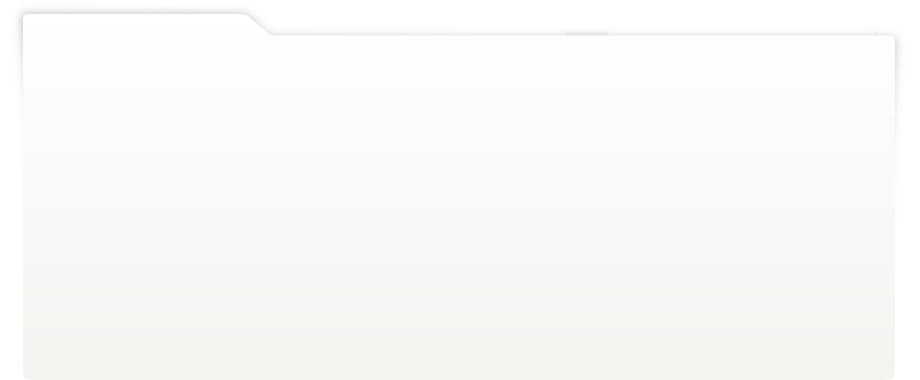
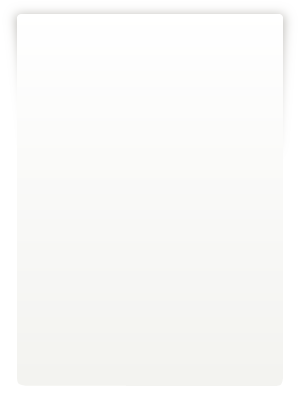
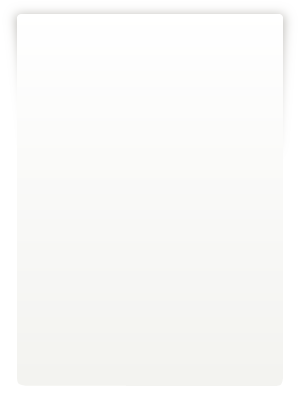
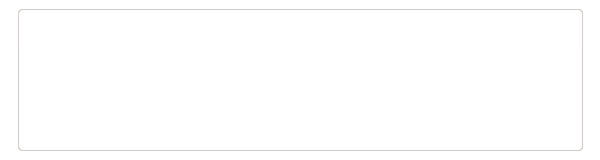
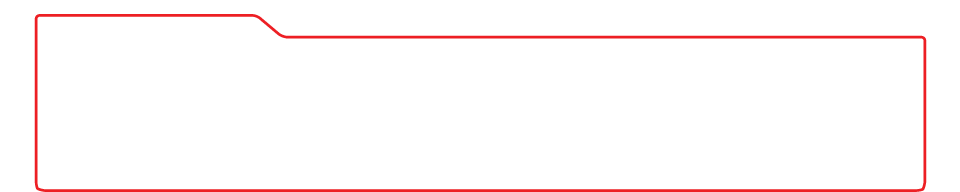
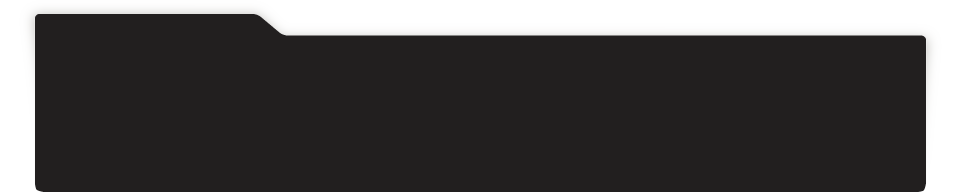
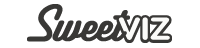
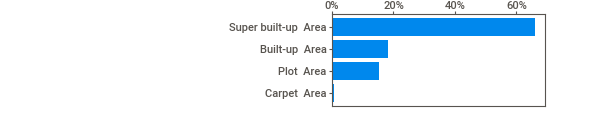
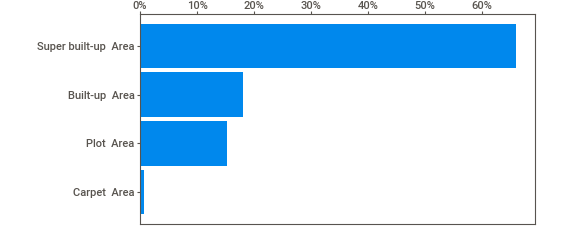
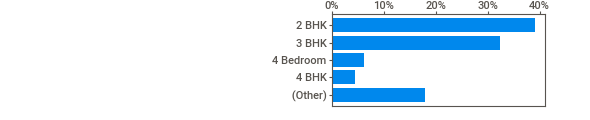
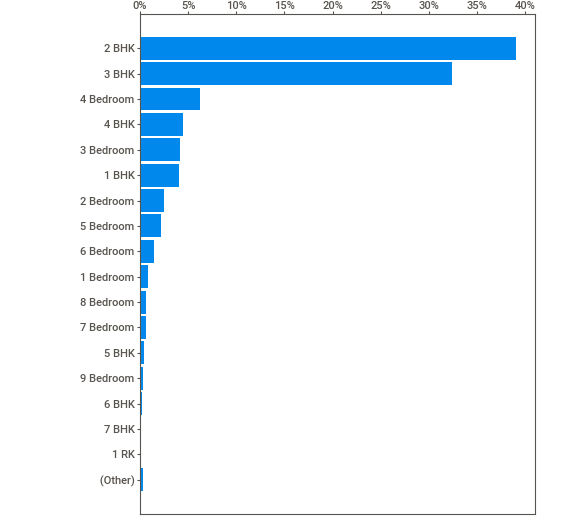
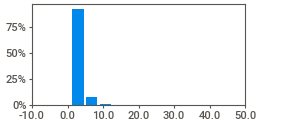
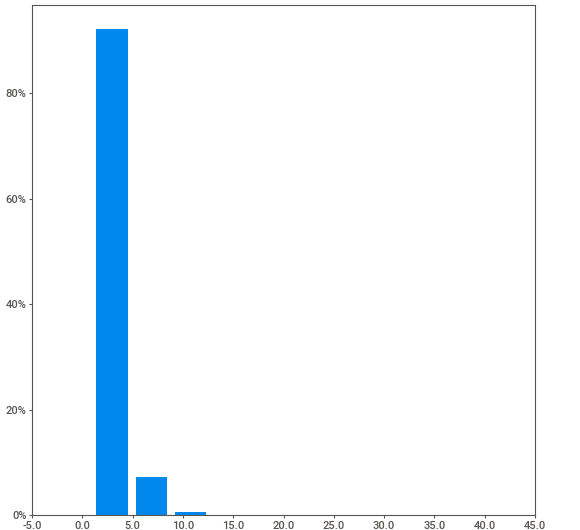
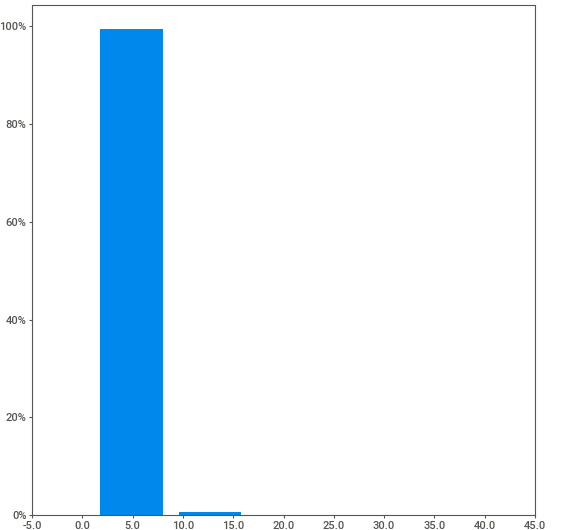
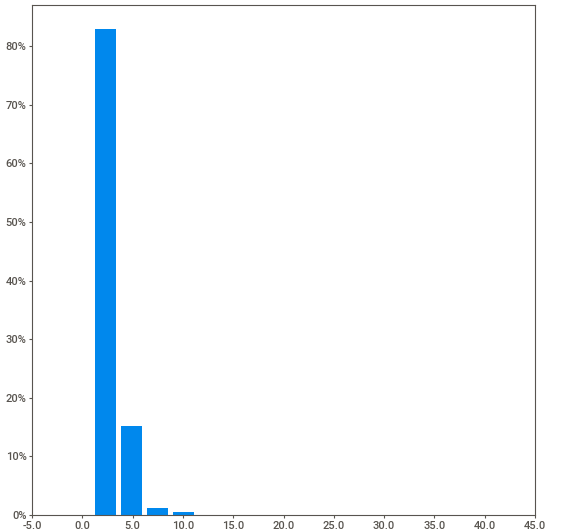
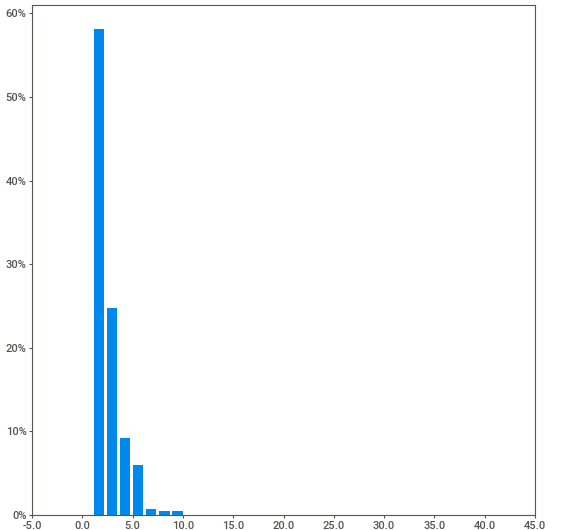
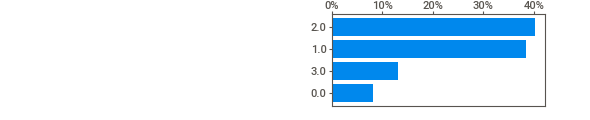
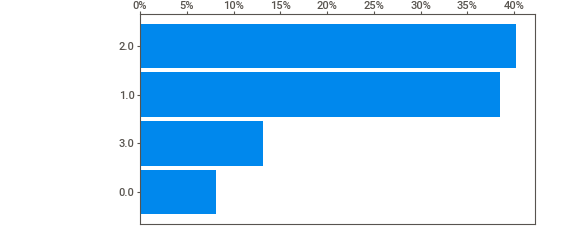
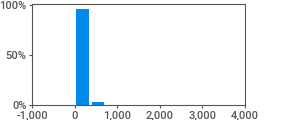
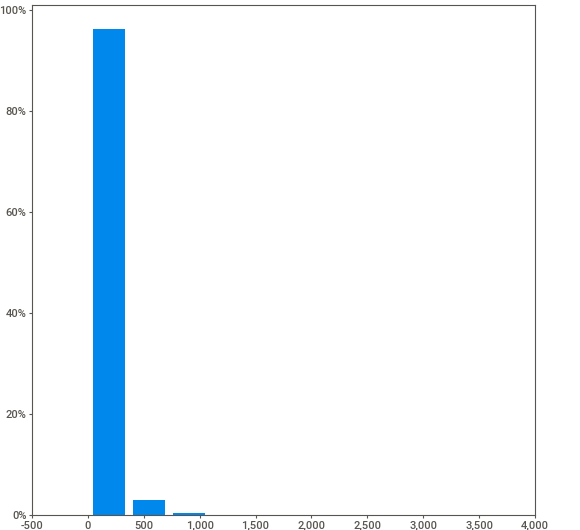
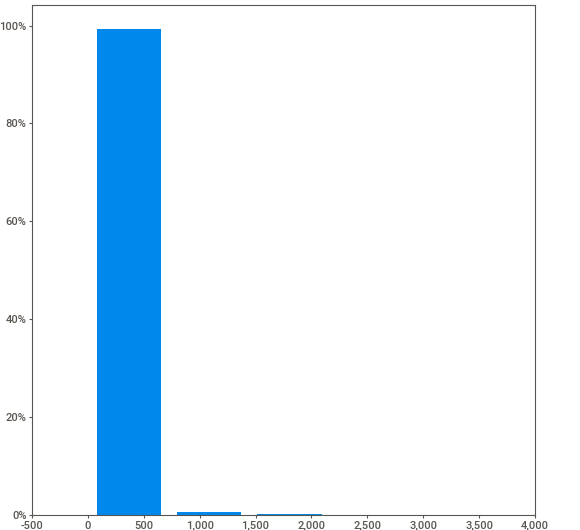
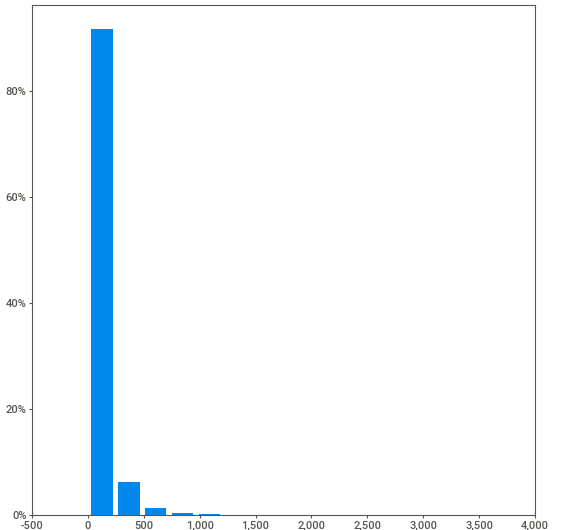
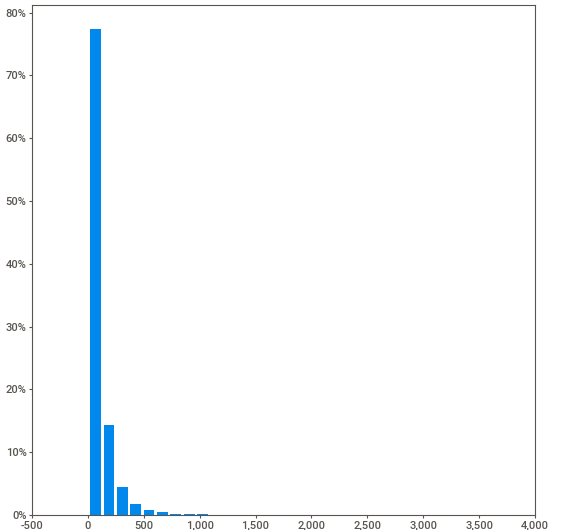
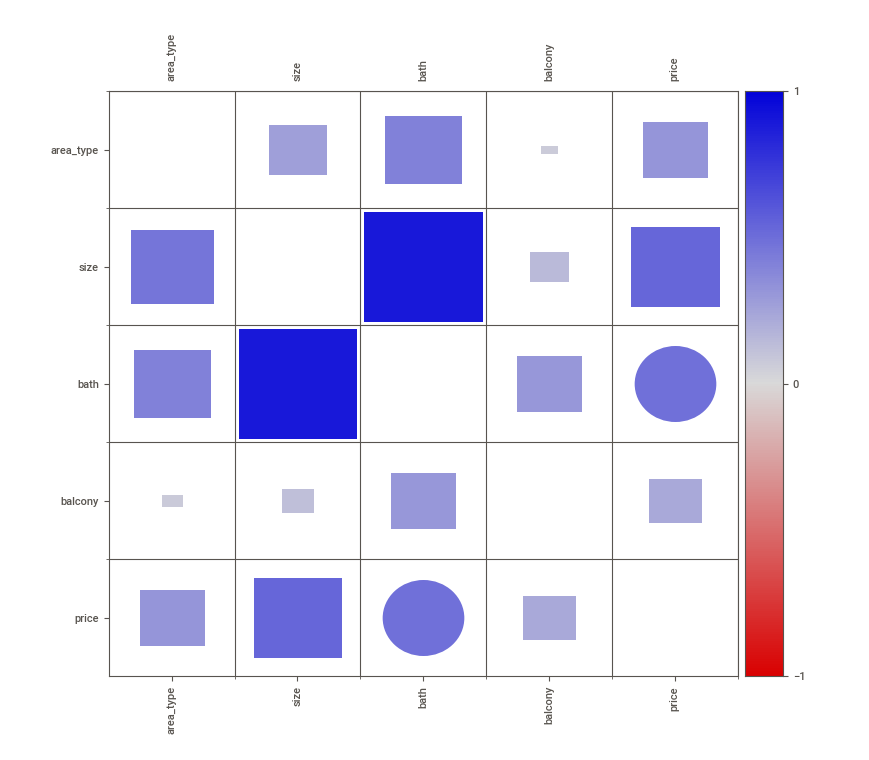
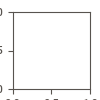

In [11]:
import sweetviz as sv
report = sv.analyze(df1)
report.show_notebook()

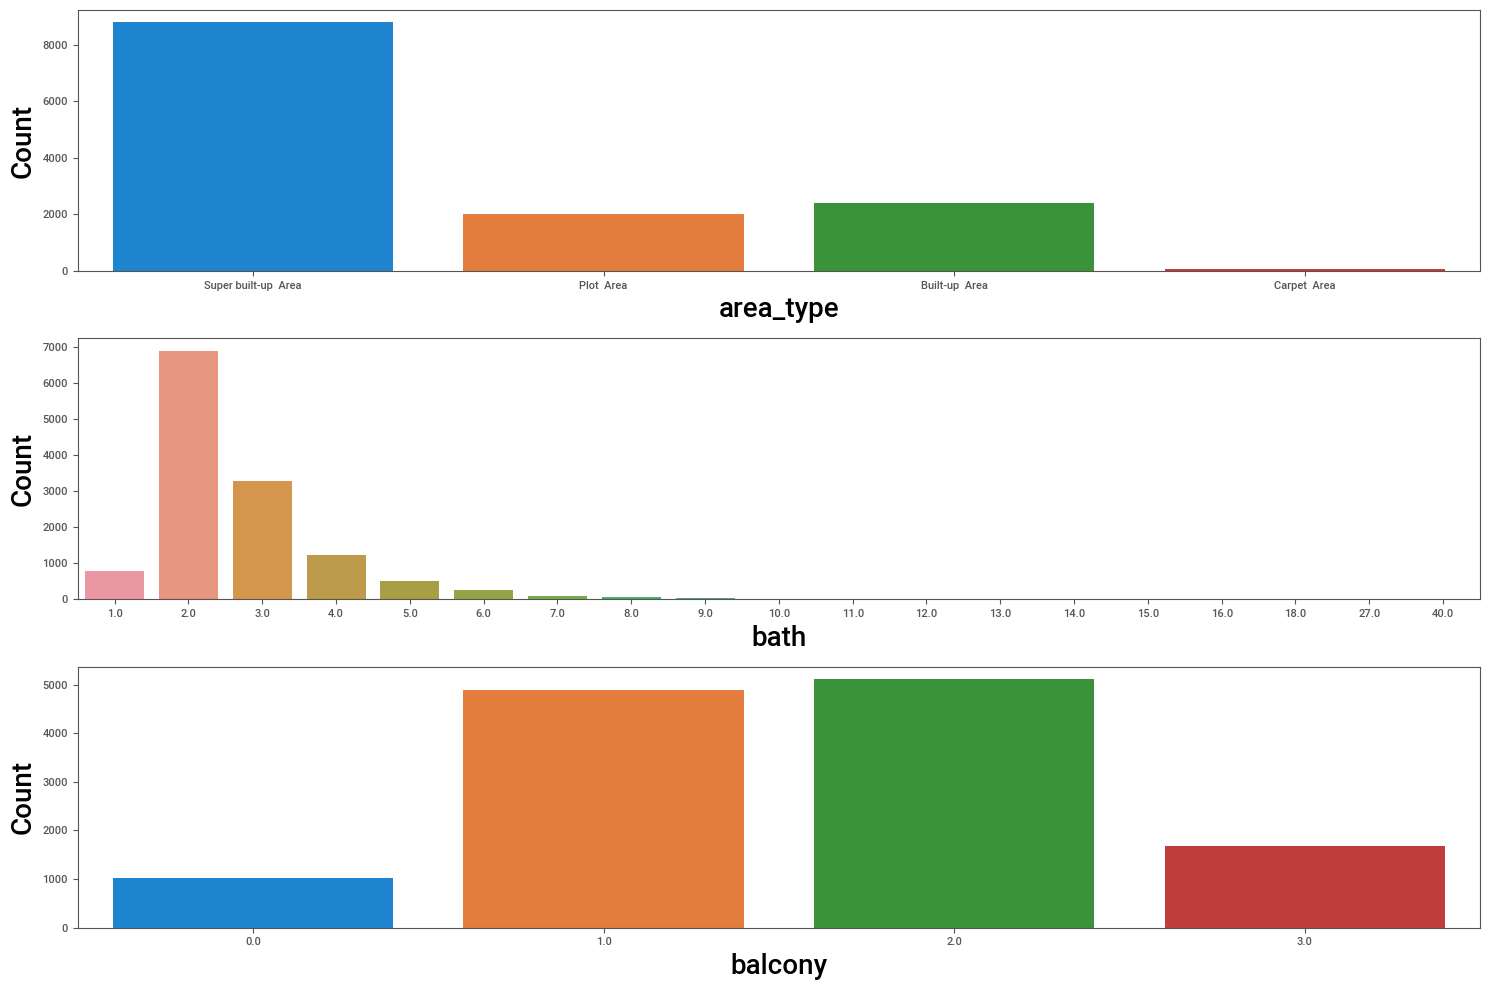

In [12]:
plt.figure(figsize=(15,10),facecolor="white")
plotnumber = 1
for column in df1[["area_type","bath","balcony"]]:
    if plotnumber <= 6:
        plt.subplot(3,1,plotnumber)
        sns.countplot(x=df1[column])
        plt.xlabel(column,fontsize=20)
        plt.ylabel('Count',fontsize=20)
    plotnumber+=1
plt.tight_layout()


<h2 style='color:blue'>Data Preprocessing</h2>

In [13]:
## Cheking for duplicated values

df1.duplicated().sum()

691

In [14]:
df2 = df1.drop_duplicates()  ## Dropping duplicated values
df2

,area_type,location,size,total_sqft,bath,balcony,price
0,Super built-up Area,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Plot Area,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00
2,Built-up Area,Uttarahalli,3 BHK,1440,2.0,3.0,62.00
3,Super built-up Area,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00
4,Super built-up Area,Kothanur,2 BHK,1200,2.0,1.0,51.00
...,...,...,...,...,...,...,...
13314,Super built-up Area,Green Glen Layout,3 BHK,1715,3.0,3.0,112.00
13315,Built-up Area,Whitefield,5 Bedroom,3453,4.0,0.0,231.00
13316,Super built-up Area,Richards Town,4 BHK,3600,5.0,NaN,400.00
13317,Built-up Area,Raja Rajeshwari Nagar,2 BHK,1141,2.0,1.0,60.00


In [15]:
## cheking null values

df2.isnull().sum()

area_type       0
location        1
size           16
total_sqft      0
bath           72
balcony       603
price           0
dtype: int64

## converting total_sqft string type to int type

In [16]:
# df2['total_sqft'] = df2['total_sqft'].astype(int) 
##  this will not work as '1134 - 654' or '34.46Sq. Meter' like values are also present.

def convert_to_numeric(sqft_value):
    if '-' in sqft_value:
        # If the value is in the format "2150 - 645", take the average of the two values
        min_sqft, max_sqft = map(float, sqft_value.split('-'))
        return (min_sqft + max_sqft) / 2
    elif sqft_value.isnumeric():
        # If the value is a numeric string, convert it to an integer directly
        return int(sqft_value)
    else:
        # For other formats, try to extract numeric values from the string and convert to an integer
        import re
        numeric_value = re.findall(r'\d+', sqft_value)
        if numeric_value:
            return int(numeric_value[0])
        else:
            return None  # Return None if no numeric value is found

# Apply the function to convert 'total_sqft' to numeric values
df2['total_sqft'] = df2['total_sqft'].apply(convert_to_numeric)

## converting size (string) to BHK (intger type column)

In [17]:
# Similarlly, defining function to convert the 'size' to the number of bedrooms (BHK)

def convert_to_bhk(bhk_value):
    # Ensure that the value is a string (handle NaN values)
    if isinstance(bhk_value, str):
        # Extract the numeric part from the string using regular expressions
        import re
        numeric_value = re.findall(r'\d+', bhk_value)
        if numeric_value:
            return int(numeric_value[0])  # Return the first numeric value found as an integer
    return None  # Return None for invalid or missing values

# Fill missing values (NaN) with an empty string and apply the function to convert 'bhk_bedrooms' to numeric values
df2['BHK'] = df2['size'].fillna('').apply(convert_to_bhk)
df2.drop('size',axis=1,inplace=True)


# df2['bhk'] = df2['size'].apply(lambda x: int(x.split(' ')[0])) ## This will work when column doesn't containt any null value.

In [18]:
df2

,area_type,location,total_sqft,bath,balcony,price,BHK
0,Super built-up Area,Electronic City Phase II,1056.0,2.0,1.0,39.07,2.0
1,Plot Area,Chikka Tirupathi,2600.0,5.0,3.0,120.00,4.0
2,Built-up Area,Uttarahalli,1440.0,2.0,3.0,62.00,3.0
3,Super built-up Area,Lingadheeranahalli,1521.0,3.0,1.0,95.00,3.0
4,Super built-up Area,Kothanur,1200.0,2.0,1.0,51.00,2.0
...,...,...,...,...,...,...,...
13314,Super built-up Area,Green Glen Layout,1715.0,3.0,3.0,112.00,3.0
13315,Built-up Area,Whitefield,3453.0,4.0,0.0,231.00,5.0
13316,Super built-up Area,Richards Town,3600.0,5.0,NaN,400.00,4.0
13317,Built-up Area,Raja Rajeshwari Nagar,1141.0,2.0,1.0,60.00,2.0


In [19]:
## Filling null values

df2.isnull().sum()

area_type       0
location        1
total_sqft      0
bath           72
balcony       603
price           0
BHK            16
dtype: int64

In [20]:
df2['location'].mode()

0    Whitefield
Name: location, dtype: object

In [21]:
df2.loc[df2['location'].isnull(),'location']='Whitefield'

<Axes: xlabel='BHK', ylabel='Count'>

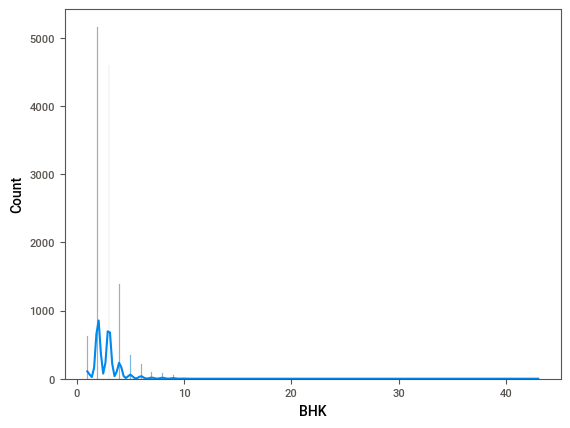

In [22]:
sns.histplot(x='BHK',data=df2,kde=True)


In [23]:
df2.loc[df2['BHK'].isnull(),'BHK']=df2['BHK'].median()

In [24]:
df2.isnull().sum()

area_type       0
location        0
total_sqft      0
bath           72
balcony       603
price           0
BHK             0
dtype: int64

<Axes: xlabel='BHK', ylabel='Count'>

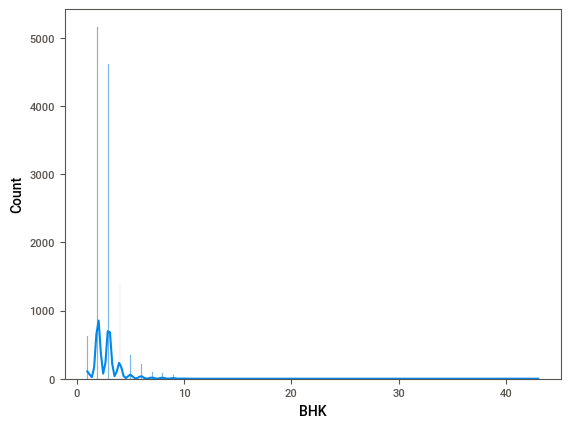

In [25]:
sns.histplot(x='BHK',data=df2,kde=True)

In [26]:
df2.loc[df2['bath'].isnull(),'bath']=df2['bath'].median()

<Axes: xlabel='balcony', ylabel='count'>

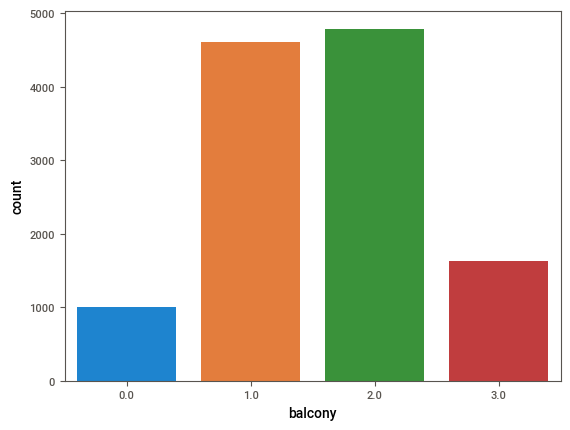

In [27]:
sns.countplot(x='balcony',data=df2)

In [28]:
df2.loc[df2['balcony'].isnull(),'balcony']=df2['balcony'].median()

In [29]:
df2.isnull().sum() 

area_type     0
location      0
total_sqft    0
bath          0
balcony       0
price         0
BHK           0
dtype: int64

## Handeling outliers

In [30]:
df2[(df2.total_sqft/df2.BHK)<300].head(10)

,area_type,location,total_sqft,bath,balcony,price,BHK
9,Plot Area,Gandhi Bazar,1020.0,6.0,2.0,370.0,6.0
45,Plot Area,HSR Layout,600.0,9.0,2.0,200.0,8.0
58,Plot Area,Murugeshpalya,1407.0,4.0,1.0,150.0,6.0
68,Plot Area,Devarachikkanahalli,1350.0,7.0,0.0,85.0,8.0
70,Plot Area,Double Road,500.0,3.0,2.0,100.0,3.0
78,Built-up Area,Kaval Byrasandra,460.0,1.0,0.0,22.0,2.0
89,Plot Area,Rajaji Nagar,710.0,6.0,3.0,160.0,6.0
119,Plot Area,Hennur Road,276.0,3.0,3.0,23.0,2.0
129,Plot Area,Vishwapriya Layout,950.0,7.0,0.0,115.0,7.0
149,Plot Area,Dinnur,1034.0,5.0,2.0,185.0,6.0


In [31]:
df3 = df2[(df2.total_sqft/df2.BHK)>300]

In [32]:
df3[df3.bath>(df3.BHK+1)]

,area_type,location,total_sqft,bath,balcony,price,BHK
84,Super built-up Area,EPIP Zone,1499.0,5.0,2.0,102.0,3.0
209,Plot Area,Padmanabhanagar,1736.0,6.0,0.0,190.0,4.0
337,Super built-up Area,Thigalarapalya,3122.0,6.0,2.0,230.0,4.0
490,Super built-up Area,Old Madras Road,4500.0,7.0,3.0,337.0,5.0
524,Super built-up Area,Jakkur,5230.0,6.0,1.0,465.0,4.0
...,...,...,...,...,...,...,...
13092,Super built-up Area,Hebbal,4000.0,6.0,1.0,440.0,4.0
13095,Super built-up Area,Sathya Sai Layout,6652.0,6.0,1.0,660.0,4.0
13119,Plot Area,Sathya Sai Layout,6688.0,6.0,1.0,700.0,4.0
13180,Super built-up Area,Sarakki Nagar,3124.0,6.0,3.0,349.0,4.0


In [33]:
df4 = df3[df3.bath<=(df3.BHK+1)]

In [34]:
df4

,area_type,location,total_sqft,bath,balcony,price,BHK
0,Super built-up Area,Electronic City Phase II,1056.0,2.0,1.0,39.07,2.0
1,Plot Area,Chikka Tirupathi,2600.0,5.0,3.0,120.00,4.0
2,Built-up Area,Uttarahalli,1440.0,2.0,3.0,62.00,3.0
3,Super built-up Area,Lingadheeranahalli,1521.0,3.0,1.0,95.00,3.0
4,Super built-up Area,Kothanur,1200.0,2.0,1.0,51.00,2.0
...,...,...,...,...,...,...,...
13314,Super built-up Area,Green Glen Layout,1715.0,3.0,3.0,112.00,3.0
13315,Built-up Area,Whitefield,3453.0,4.0,0.0,231.00,5.0
13316,Super built-up Area,Richards Town,3600.0,5.0,2.0,400.00,4.0
13317,Built-up Area,Raja Rajeshwari Nagar,1141.0,2.0,1.0,60.00,2.0


In [35]:
df5 = df4.copy()
df5['price_per_sqft'] = df5['price']*100000/df5['total_sqft']
df5.head()

,area_type,location,total_sqft,bath,balcony,price,BHK,price_per_sqft
0,Super built-up Area,Electronic City Phase II,1056.0,2.0,1.0,39.07,2.0,3699.810606
1,Plot Area,Chikka Tirupathi,2600.0,5.0,3.0,120.00,4.0,4615.384615
2,Built-up Area,Uttarahalli,1440.0,2.0,3.0,62.00,3.0,4305.555556
3,Super built-up Area,Lingadheeranahalli,1521.0,3.0,1.0,95.00,3.0,6245.890861
4,Super built-up Area,Kothanur,1200.0,2.0,1.0,51.00,2.0,4250.000000


In [36]:
df5.price_per_sqft.describe()

count     11531.000000
mean       6216.730021
std        4016.587951
min         267.829813
25%        4226.639701
50%        5285.412262
75%        6839.856050
max      176470.588235
Name: price_per_sqft, dtype: float64

## Dimensionality Reduction

In [37]:
location_stats = df5['location'].value_counts(ascending=False)
location_stats

Whitefield                            506
Sarjapur  Road                        356
Electronic City                       271
Thanisandra                           226
Kanakpura Road                        223
                                     ... 
Lakshmipura Vidyaanyapura               1
Malur Hosur Road                        1
Kengeri Satellite Town ( BDA SITE)      1
Brigade Road                            1
Abshot Layout                           1
Name: location, Length: 1178, dtype: int64

In [38]:
location_stats_less_than_10 = location_stats[location_stats<=10]
location_stats_less_than_10

Nagappa Reddy Layout                  10
Giri Nagar                            10
Kalkere                               10
LB Shastri Nagar                      10
Tindlu                                10
                                      ..
Lakshmipura Vidyaanyapura              1
Malur Hosur Road                       1
Kengeri Satellite Town ( BDA SITE)     1
Brigade Road                           1
Abshot Layout                          1
Name: location, Length: 968, dtype: int64

In [39]:
df5.location = df5.location.apply(lambda x: 'other' if x in location_stats_less_than_10 else x)
len(df5.location.unique())

211

### Here ,price per sqft was found in a range of minimum price of  267.82 and maximum price of 176470. This shows a wide variation in property prices. We should remove outliers per location using mean and one standard deviation

In [40]:
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        m = np.mean(subdf.price_per_sqft)
        st = np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft>(m-st)) & (subdf.price_per_sqft<=(m+st))]
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out
df6 = remove_pps_outliers(df5)
df6.shape

(9444, 8)

### We should also remove properties where for same location, the price of (for example) 3 bedroom apartment is less than 2 bedroom apartment (with same square ft area).

In [41]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('BHK'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('BHK'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')
df7 = remove_bhk_outliers(df6)
df7.shape

(6635, 8)

**Let's check if for a given location how does the 2 BHK and 3 BHK property prices look like**

In [42]:
def plot_scatter_chart(df,location):
    bhk2 = df[(df.location==location) & (df.BHK==2)]
    bhk3 = df[(df.location==location) & (df.BHK==3)]
    plt.figure(figsize=(15,10),facecolor="white")
    sns.scatterplot(x=bhk2.total_sqft,y=bhk2.price,color='blue',label='2 BHK', s=50)
    sns.scatterplot(x=bhk3.total_sqft,y=bhk3.price,marker='+', color='red',label='3 BHK', s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price (Lakh Indian Rupees)")
    plt.title(location)
    plt.legend()

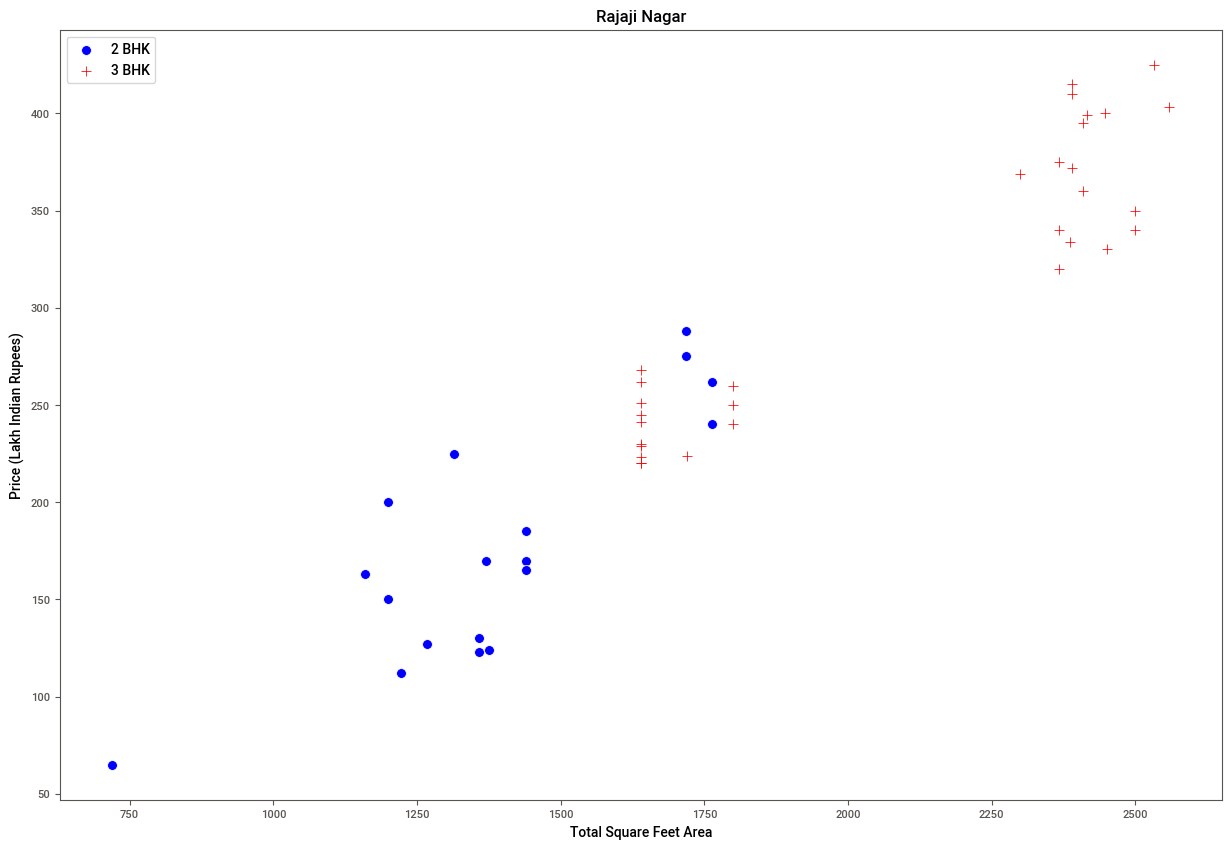

In [43]:
plot_scatter_chart(df7,"Rajaji Nagar")

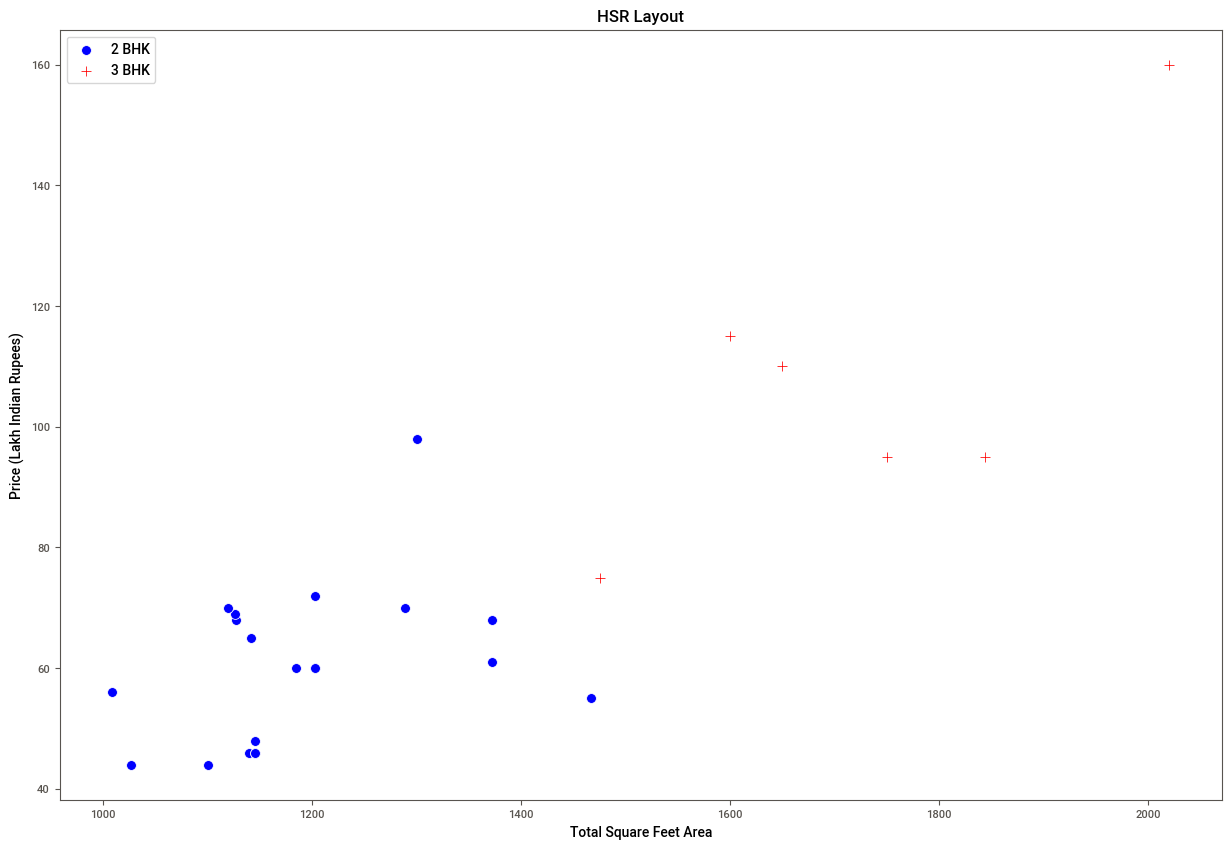

In [44]:
plot_scatter_chart(df7,"HSR Layout")

In [45]:
df7.drop("price_per_sqft", axis=1,inplace=True)

### One Hot Encoding on Location and Area_type column

In [46]:
dummies = pd.get_dummies(df7.location)
dummies1 = pd.get_dummies(df7.area_type)
df8 = pd.concat([df7,dummies1,dummies.drop('other', axis=1)],axis=1).drop(['location','area_type'],axis=1)

In [47]:
df8.head(3)

,total_sqft,bath,balcony,price,BHK,Built-up Area,Carpet Area,Plot Area,Super built-up Area,Devarachikkanahalli,...,Varthur Road,Vidyaranyapura,Vijayanagar,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
1,1250.0,2.0,2.0,40.0,2.0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
2,1200.0,2.0,2.0,83.0,2.0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1170.0,2.0,2.0,40.0,2.0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0


## Model Creation

In [48]:
X = df8.drop("price",axis=1)
y = df8.price

In [49]:
X.shape

(6635, 218)

In [50]:
y.shape

(6635,)

In [51]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=10,test_size=0.2)

### Linear Regression 

In [52]:
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(X_train,y_train)
score = lr_clf.score(X_test,y_test)
y_pred = lr_clf.predict(X_test)

In [53]:
score

0.8437958991755841

In [54]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
mse = mean_squared_error(y_pred,y_test)
mae = mean_absolute_error(y_pred,y_test)
print("mse : ",mse)
print("mae : ",mae)

mse :  935.4561198596213
mae :  17.22322831954396


In [55]:
## checking cross validation score
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

scores = cross_val_score(LinearRegression(), X, y, cv=cv)
print(scores)
print(scores.mean())

[0.79678806 0.77266483 0.89680994 0.89619728 0.86166974]
0.8448259705644802


### Decision Tree

In [56]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor()
dtr.fit(X_train,y_train)
y_pred = dtr.predict(X_test)

In [57]:
## ModelEvaluation
from sklearn.metrics import mean_absolute_error,mean_squared_error
mse = mean_squared_error(y_pred,y_test)
mae = mean_absolute_error(y_pred,y_test)
print("mse : ",mse)
print("mae : ",mae)

mse :  1434.3709692102123
mae :  20.428502942548537


In [58]:
score = dtr.score(X_test,y_test)
score

0.7604862240596064

In [59]:
## checking cross validation score
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

scores = cross_val_score(dtr, X, y, cv=cv)
print(scores)
print(scores.mean())

[0.68482658 0.60011363 0.8249395  0.83678043 0.79757256]
0.7488465394125836


## Support Vector Machine

In [60]:
from sklearn.svm import SVR
svr = SVR()
svr.fit(X_train,y_train)
y_hat = svr.predict(X_test)

In [61]:
## ModelEvaluation
from sklearn.metrics import mean_absolute_error,mean_squared_error
mse = mean_squared_error(y_hat,y_test)
mae = mean_absolute_error(y_hat,y_test)
print("mse : ",mse)
print("mae : ",mae)

mse :  2307.1474995151607
mae :  22.805685462847087


In [62]:
## checking cross validation score
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

scores = cross_val_score(svr, X, y, cv=cv)
print(scores)
print(scores.mean())

[0.62156747 0.43671602 0.44880614 0.43801851 0.66322401]
0.5216664298725868


**Based on above results we can say that LinearRegression gives the best score. Hence we will use that.**

## Test the model for few properties

In [65]:
def predict_price(location,sqft,bath,bhk):    
    loc_index = np.where(X.columns==location)[0][0]

    x = np.zeros(len(X.columns))
    x[0] = sqft
    x[1] = bath
    x[2] = bhk
    if loc_index >= 0:
        x[loc_index] = 1

    return lr_clf.predict([x])[0]

In [66]:
predict_price('1st Phase JP Nagar',1000, 2, 2)

90.03799660285962

In [67]:
predict_price('1st Phase JP Nagar',1000, 3, 3)


92.87189403794734

In [68]:
predict_price('Indira Nagar',1000, 2, 2)


178.84520368734104

In [69]:
predict_price('Indira Nagar',1000, 3, 3)

181.67910112242873

## Export the tested model to a pickle file

In [70]:
import pickle
with open('banglore_home_prices_model.pickle','wb') as f:
    pickle.dump(lr_clf,f)

## Export location and column information to a file that will be useful later on in our prediction application

In [71]:
import json
columns = {
    'data_columns' : [col.lower() for col in X.columns]
}
with open("columns.json","w") as f:
    f.write(json.dumps(columns))
